# HATLAS-SGP master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
04829ed (Thu Nov 2 16:57:19 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
#SUFFIX = "_20171024"

master_catalogue = Table.read("{}/master_catalogue_hatlas-sgp{}.fits".format(OUT_DIR, SUFFIX))

## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

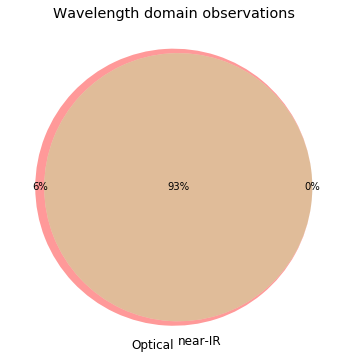

In [5]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

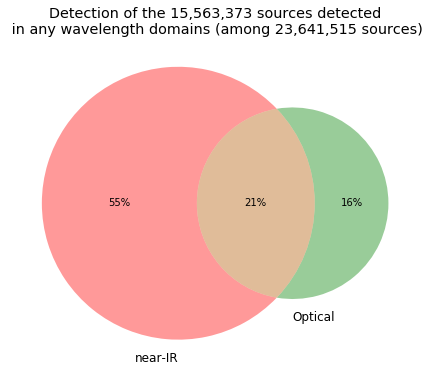

In [6]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["OmegaCAM u"]
g_bands = ["OmegaCAM g", "GPC1 g"]
r_bands = ["OmegaCAM r", "GPC1 r"]
i_bands = ["OmegaCAM i", "GPC1 i"]
z_bands = [              "GPC1 z", "VISTA z"]
y_bands = [              "GPC1 y", "VISTA y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

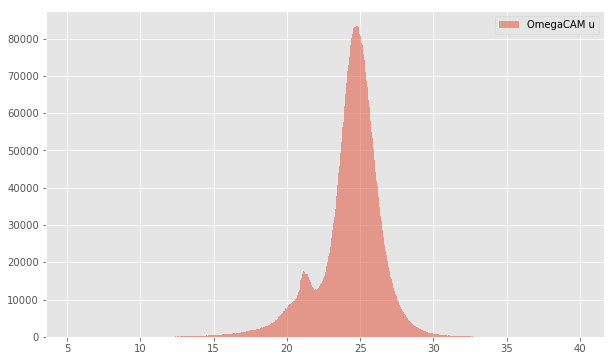

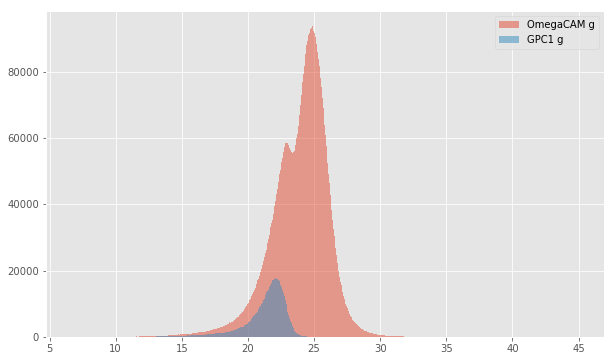

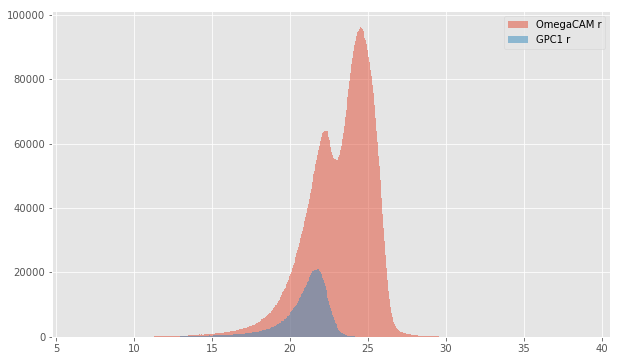

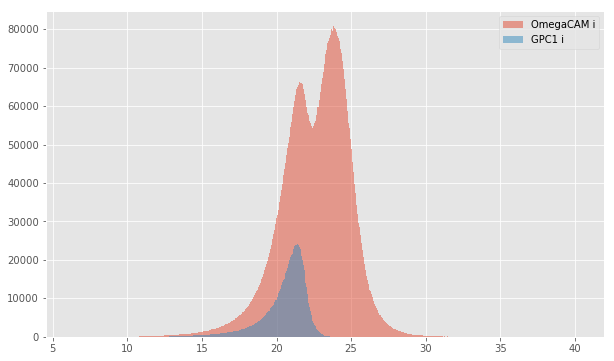

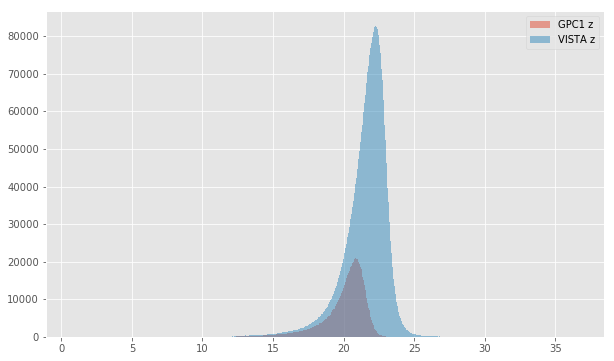

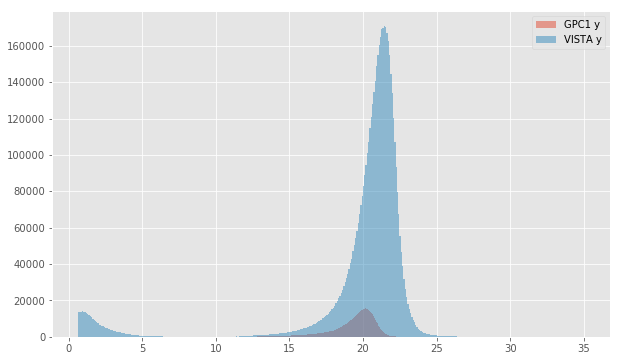

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

GPC1 g (aperture) - OmegaCAM g (aperture):
- Median: -0.31
- Median Absolute Deviation: 0.29
- 1% percentile: -1.5159728938427723
- 99% percentile: 1.7853768159130867


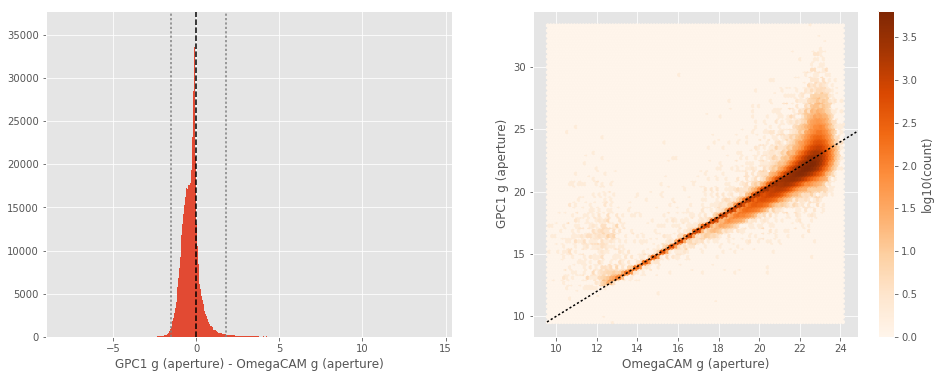

GPC1 g (total) - OmegaCAM g (total):
- Median: -0.07
- Median Absolute Deviation: 0.18
- 1% percentile: -1.4530585299987795
- 99% percentile: 0.8564142804870603


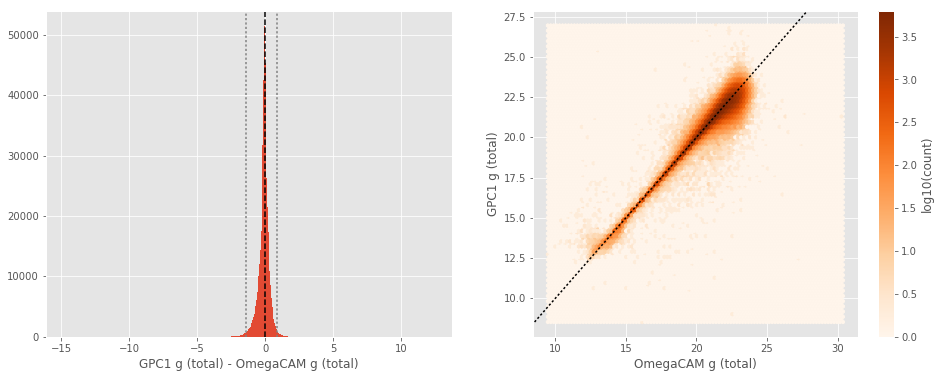

GPC1 r (aperture) - OmegaCAM r (aperture):
- Median: -0.19
- Median Absolute Deviation: 0.23
- 1% percentile: -1.1318426337792982
- 99% percentile: 1.3895528260498082


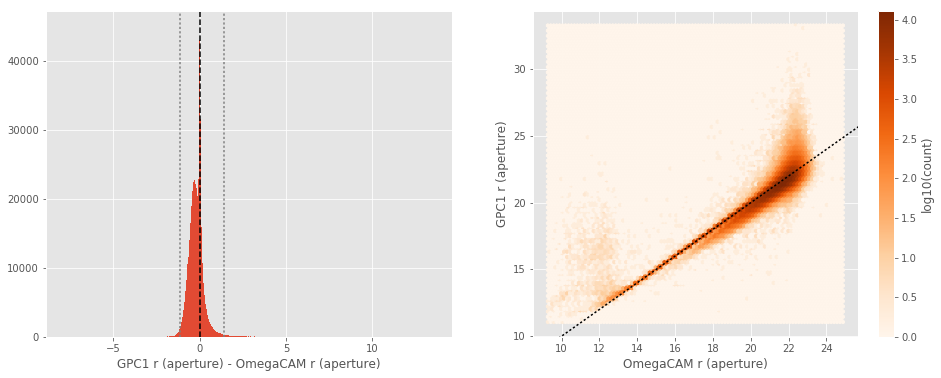

GPC1 r (total) - OmegaCAM r (total):
- Median: 0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -1.0572116187500005
- 99% percentile: 1.0315193059753418


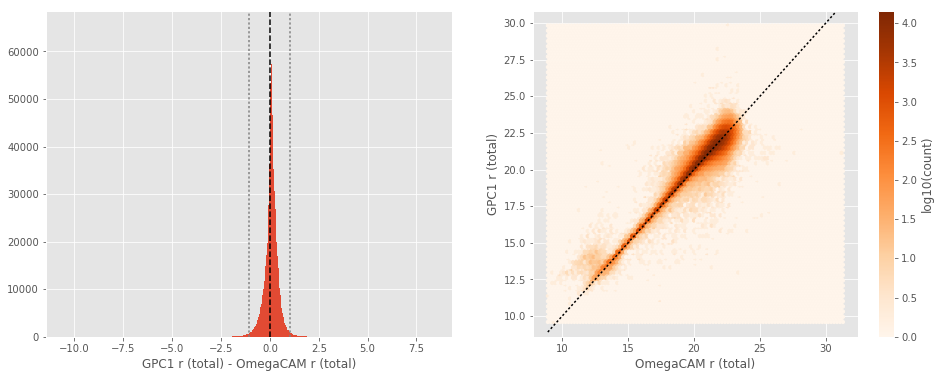

GPC1 i (aperture) - OmegaCAM i (aperture):
- Median: -0.19
- Median Absolute Deviation: 0.20
- 1% percentile: -1.0190542891967767
- 99% percentile: 0.6748539605163592


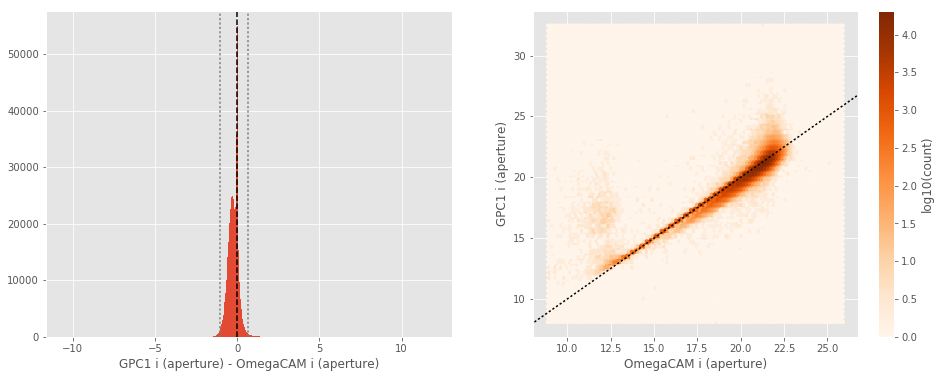

GPC1 i (total) - OmegaCAM i (total):
- Median: 0.05
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8430125835058598
- 99% percentile: 0.8037666719433578


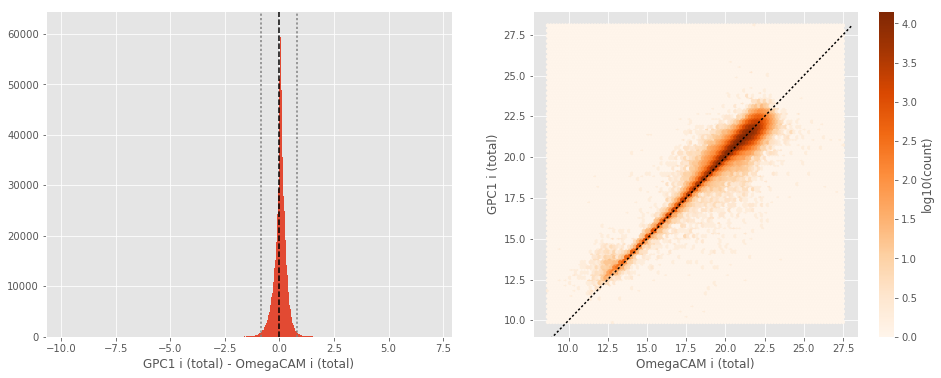

VISTA z (aperture) - GPC1 z (aperture):
- Median: 0.12
- Median Absolute Deviation: 0.22
- 1% percentile: -1.5181993675231933
- 99% percentile: 1.0516272544860827


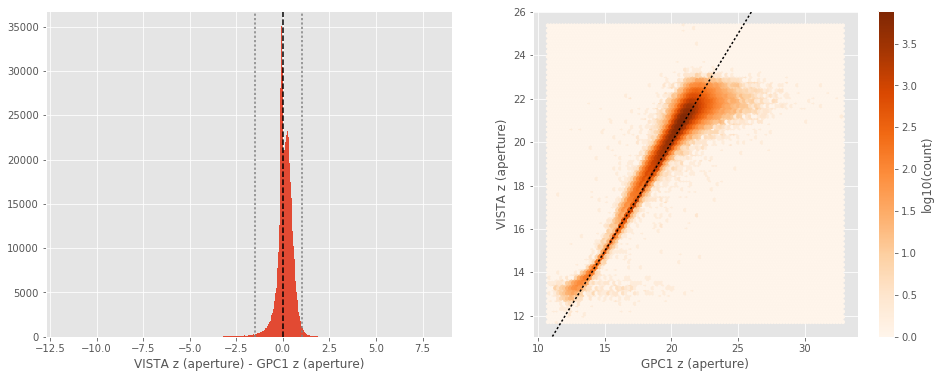

VISTA z (total) - GPC1 z (total):
- Median: -0.17
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2149468994140626
- 99% percentile: 0.8868562507629393


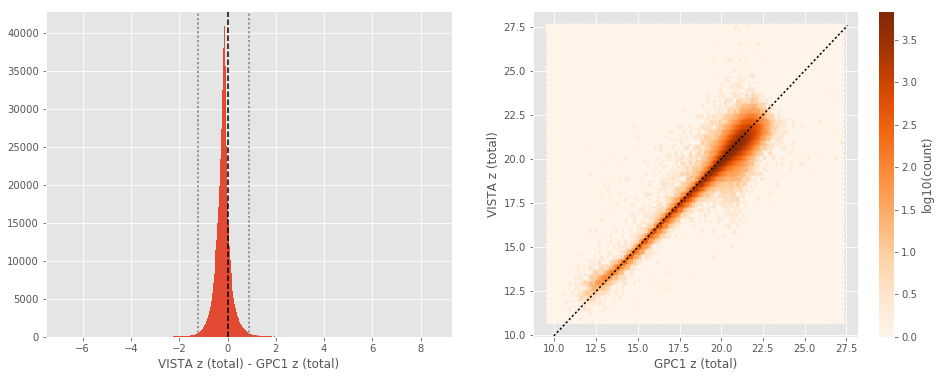

VISTA y (aperture) - GPC1 y (aperture):
- Median: 0.10
- Median Absolute Deviation: 0.29
- 1% percentile: -2.488289661407471
- 99% percentile: 1.4259613227844232


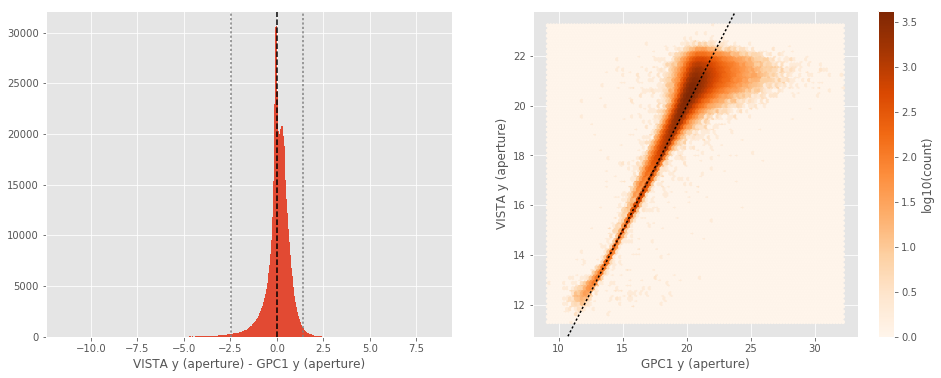

VISTA y (total) - GPC1 y (total):
- Median: -0.22
- Median Absolute Deviation: 0.18
- 1% percentile: -1.2680959701538086
- 99% percentile: 1.0602777481079078


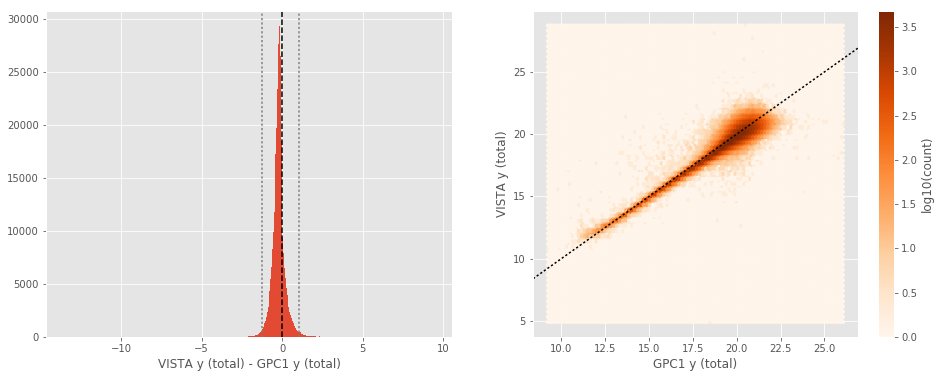

In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the VISTA total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, VISTA uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [11]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [12]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_HATLAS-SGP.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

VISTA J (total) - 2MASS J:
- Median: 0.03
- Median Absolute Deviation: 0.07
- 1% percentile: -1.1194814927579704
- 99% percentile: 1.150870347451982


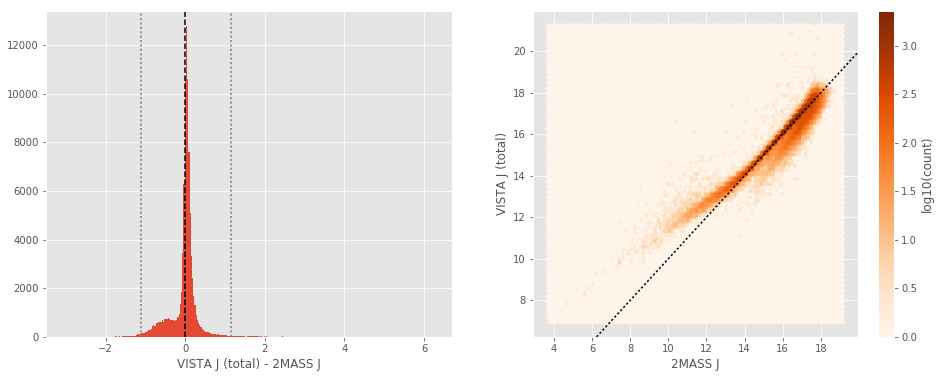

In [13]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vista_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

VISTA Ks-like (total) - 2MASS Ks:
- Median: 0.04
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0610409959276732
- 99% percentile: 1.185474546140809


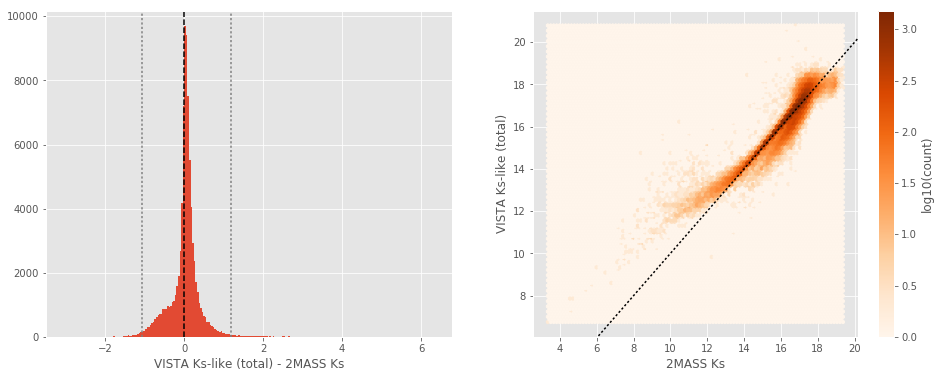

In [14]:
vista_ks_like = master_catalogue['m_vista_k'] + 0.003 + 0.004 * (
    master_catalogue['m_vista_k'] - master_catalogue['m_vista_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, vista_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "VISTA Ks-like (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 12930467 / 23641515 (54.69%)


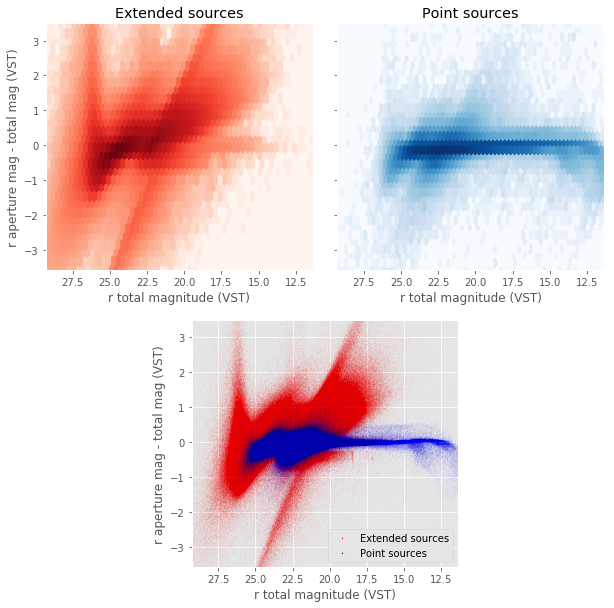

In [15]:
nb_ccplots(
    master_catalogue['m_omegacam_r'],
    master_catalogue['m_ap_omegacam_r'] - master_catalogue['m_omegacam_r'],
    "r total magnitude (VST)", "r aperture mag - total mag (VST)",
    master_catalogue["stellarity"],
    invert_x=True
)

Number of source used: 845138 / 23641515 (3.57%)


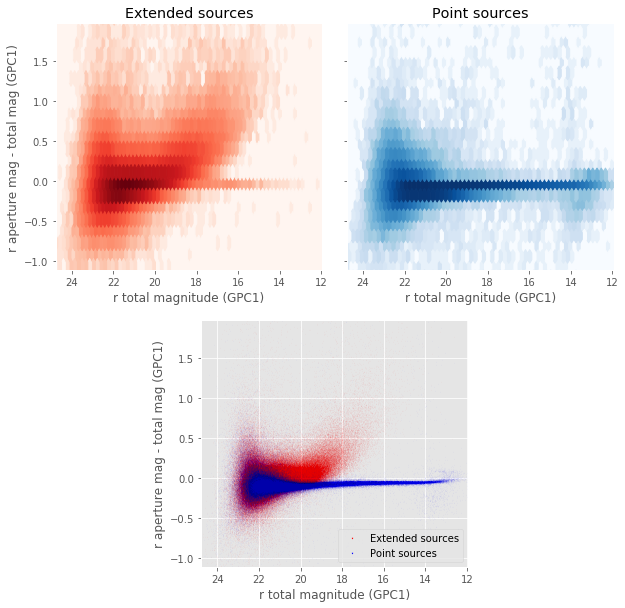

In [16]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (GPC1)", "r aperture mag - total mag (GPC1)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 1863979 / 23641515 (7.88%)


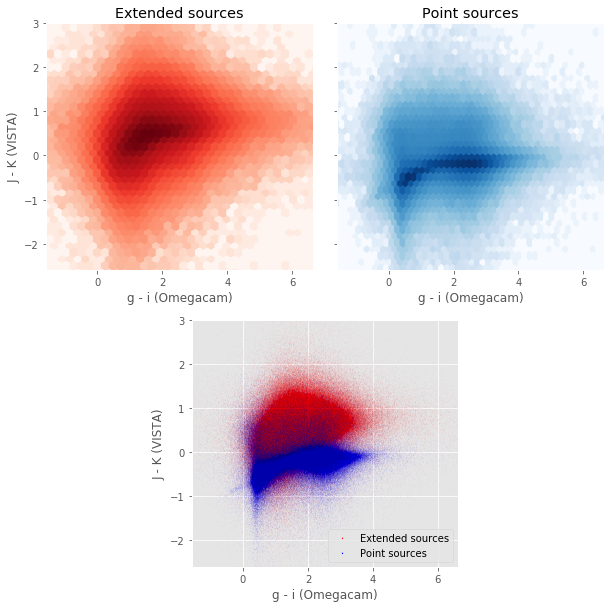

In [17]:
nb_ccplots(
    master_catalogue['m_omegacam_g'] - master_catalogue['m_omegacam_i'],
    master_catalogue['m_vista_j'] - master_catalogue['m_vista_k'],
    "g - i (Omegacam)", "J - K (VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 253184 / 23641515 (1.07%)


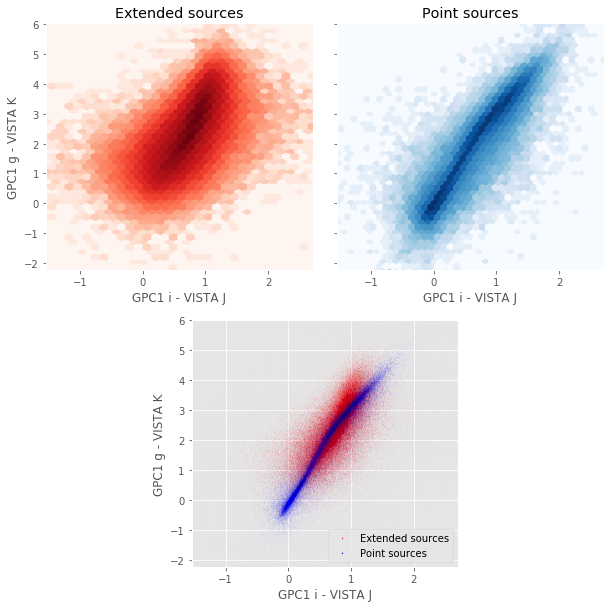

In [18]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_vista_j'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_vista_k'],
    "GPC1 i - VISTA J", "GPC1 g - VISTA K",
    master_catalogue["stellarity"]
)

Number of source used: 6640916 / 23641515 (28.09%)


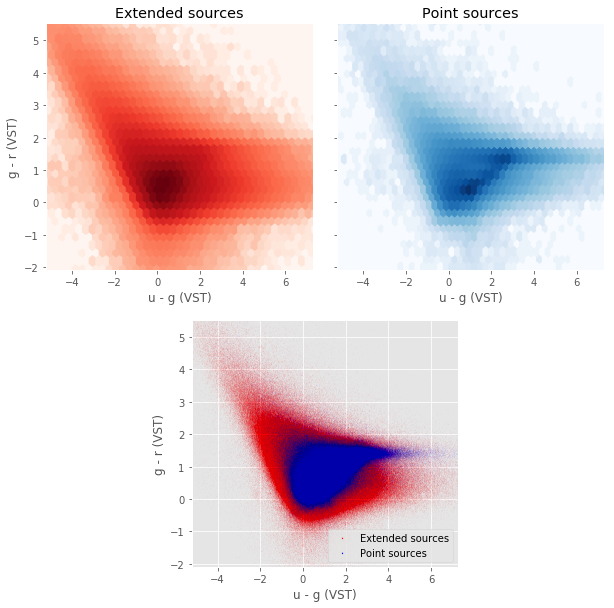

In [19]:
nb_ccplots(
    master_catalogue['m_omegacam_u'] - master_catalogue['m_omegacam_g'],
    master_catalogue['m_omegacam_g'] - master_catalogue['m_omegacam_r'],
    "u - g (VST)", "g - r (VST)",
    master_catalogue["stellarity"]
)

Number of source used: 253184 / 23641515 (1.07%)


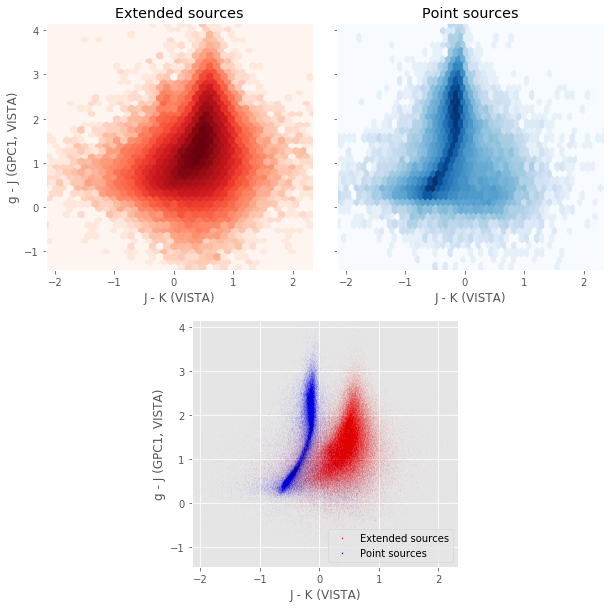

In [20]:
nb_ccplots(
    master_catalogue['m_vista_j'] - master_catalogue['m_vista_k'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    "J - K (VISTA)", "g - J (GPC1, VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 462154 / 23641515 (1.95%)


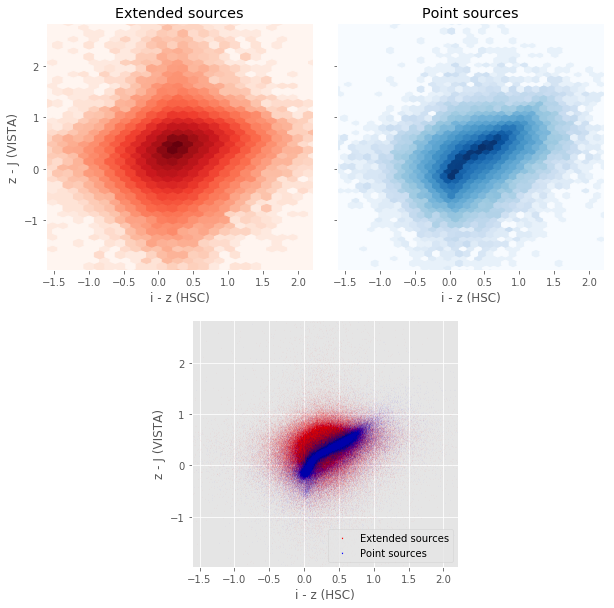

In [21]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_gpc1_z'],
    master_catalogue['m_vista_z'] - master_catalogue['m_vista_j'],
    "i - z (HSC)", "z - J (VISTA)",
    master_catalogue["stellarity"]
)